Note: Exercise taken from the Fundamentals course of the PGP AIML at The University of Texas

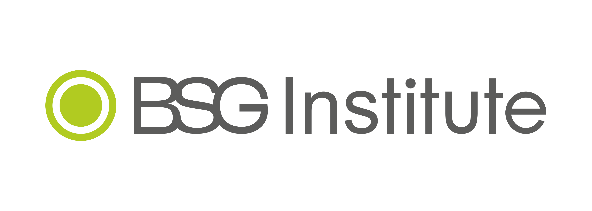

### **Objective:**
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

### **Steps:**
1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.

### **Key Questions:**
I would like to study the correlation between the treadmill model and the other columns in the dataset. To do that, my key question will be:

1. Are there some correlation between the numerics (Age, Education, Usage, Fitness, Income, Miles) columns and the product name?
2. What is the group of age of the customer that bought more products? it will be used to determine what model I can offer to the new customer depending on his/her age.
3. What is marital status of the customer that bought more products? it will be used to determine what model I can offer to the new customer depending on his/her marital status.
4. What is the high level education of the customer that bought more products?


### **Data Description:**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

* Product: The model no. of the treadmill
* Age: Age of the customer in no of years
* Gender: Gender of the customer
* Education: Education of the customer in no. of years
* Marital Status: Marital status of the customer
* Usage: Avg. # times the customer wants to use the treadmill every week
* Fitness: Self rated fitness score of the customer (5 - very fit, 1 - very unfit
* Income: Income of the customer
* Miles: Miles that a customer expects to run

## **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

#to display values upto 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Instruction from https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set_theme(style="darkgrid")

### **Loading the dataset**

In [ ]:
# Reading the dataset
data = pd.read_csv('../fuentes/3.CardioGoodFitness.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

### **Data Overview**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first few rows of the dataset**

In [ ]:
# looking at head (5 observations) 
df.head()

In [ ]:
# looking at tail (5 observations) 
df.tail()

<strong>Observation:</strong>

- *The `Product` column contains the model name of the treadmill*
- *The `Gender` column contains the gender of the customer that uses the treadmill* 
- *The `Marital Status` column contains the marital status of the customer* 
- *`Miles` and `Usage` are related to the product*
- *The `Fitness` column indicates the customer's own rating*

#### **Checking the shape of the dataset**

In [ ]:
df.shape

<strong>Observation:</strong> <I>the dataset have 180 rows and 9 columns</I>

#### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<strong>Observation:</strong>

- *According to the table, all the columns have 180 observations*
- *According to the table, No missing values were found, It'll be investigated later*
- *The object type columns contain categories in them, the data type will be changed later*

#### **Getting the statistical summary for the dataset**

In [ ]:
df.describe().T

In [ ]:
df.describe(include='all').T

<strong>Observation:</strong>
- *The customer age is in the ranage of 18 to 50*
- *The min/max values from fitness are from 1-5*
- *The product usage days go from 2 to 7 days in a week*
- *The range of the education column varies from 12 to 21.*
- *We can found customer with a good income*

**Let's check the count of each unique category in each of the categorical/object type variables.**

In [ ]:
df['Product'].unique()

<strong>Observation:</strong>

- *We can observe that there are 3 unique products present in the dataset of the retail store Cardio Good Fitness*

In [ ]:
df['Product'].value_counts(normalize=True)

<strong>Observation:</strong>

- *Around 44% of the observations are from the TM195 Product, it is almost 50% of the products sold.*

In [ ]:
df['Gender'].unique()

<strong>Observation:</strong>

- *We can observe that there are 2 unique Gender present in the dataset of the retail store Cardio Good Fitness*

In [ ]:
df['Gender'].value_counts(normalize=True)

<strong>Observation:</strong>

- *The number of Male observations is much more than Female observations*
- *Around 58% of the observations are from Male*

In [ ]:
df['MaritalStatus'].unique()

<strong>Observation:</strong>

- *We can observe that there are 2 unique kinds of the marital status present in the dataset of the retail store Cardio Good Fitness*

In [ ]:
df['MaritalStatus'].value_counts(normalize=True)

<strong>Observation:</strong>

- *The number of Partnered observations is much more than single observations*
- *Around 59% of the observations are from Partnered*

### **Missing value treatment**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations. 

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

Checking how many missing values are present in each variable.

In [ ]:
# checking missing values across each columns
df.isnull().sum()

<strong>Observation:</strong>

- *There are no missing values in variables*

## **Exploratory Data Analysis**

### **Univariate Analysis**

**Numerical variables.**<br>
[Age, Education, Usage, Fitness, Income, Miles]

In [ ]:
# Defining the function for creating boxplot and hisogram
# Function has taken from Week 3 - Uber Case Study

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

**Analyzing of the Age Column**

In [ ]:
df['Age'].mean()

In [ ]:
df['Age'].median()

In [ ]:
histogram_boxplot(df,'Age')

<strong>Observation:</strong>

- *The distribution of Age is right skewed*
- *Customer buying more products are young and the average of the Age is 28 years old.*
- *There are a some outliers in this variable*
- *The median of the age is 26*
- *Customers over 40 are buying fewer products on the store*

**Analyzing of the Education Column**

In [ ]:
df['Education'].mean()

In [ ]:
df['Education'].median()

In [ ]:
histogram_boxplot(df,'Education')

<strong>Observation:</strong>

- *There are a some outliers in this variable*
- *The education's average of the curstomer is 16*

**Analyzing of the Usage Column**

In [ ]:
df['Usage'].mean()

In [ ]:
df['Usage'].median()

In [ ]:
histogram_boxplot(df,'Usage')

<strong>Observation:</strong>

- *There are a some outliers in this variable*
- *The products bought by customers are being used at least 3 o 4 days in the week*
- *The average of the Usage is 3.5 days in the week*

**Analyzing of the Fitness Column**

In [ ]:
df['Fitness'].mean()

In [ ]:
df['Fitness'].median()

In [ ]:
histogram_boxplot(df,'Fitness')

<strong>Observation:</strong>

- *There are a some outliers towards the left in this variable*
- *The products bought by customers are being rated with at least 3 points of Fitness*
- *The average of the Fitness is 3 stars*

**Analyzing of the Income Column**

In [ ]:
df['Income'].mean()

In [ ]:
df['Income'].median()

In [ ]:
histogram_boxplot(df,'Income')

<strong>Observation:</strong>

- *The distribution of Income is right skewed*
- *Customers buying more products have an income average of US53.000.*
- *There are a some outliers towards the right in this variable*
- *The median of the income is US50.000*
- *Customers with more acquisition power are buying fewer products in the store*

**Analyzing of the Miles Column**

In [ ]:
df['Miles'].mean()

In [ ]:
df['Miles'].median()

In [ ]:
histogram_boxplot(df,'Miles')

<strong>Observation:</strong>

- *The distribution of Miles is highly right skewed*
- *Customers buying more products expected to run an average of 100 miles*
- *There are a some outliers towards the right in this variable*
- *The median of the Miles is 94*

**Categorical variables**<br>
[Product, Gender, MaritalStatus]

**Analyzing of the Product Column**

In [ ]:
sns.countplot(data=df,x='Product').set_title("Product Name");
plt.xticks(rotation = 45);

<strong>Observation:</strong>

- *The number of products observations is more on TM195 than others, with which it is concluded that it is the best seller in the store*

**Analyzing of the Gender Column**

In [ ]:
sns.countplot(data=df,x='Gender').set_title("Gender Category");
plt.xticks(rotation = 45);

<strong>Observation:</strong>

- *The number of products observations is more in Males than Females, with which it is concluded that there are more Males buying products in the store than Females*

**Analyzing of the MaritalStatus Column**

In [ ]:
sns.countplot(data=df,x='MaritalStatus').set_title("Marital Status Category");
plt.xticks(rotation = 45);

<strong>Observation:</strong>

- *The number of products observations is more in married customer than Single, with which it is concluded that there are more married customer buying products in the store than Single*

### **Bivariate Analysis**

**Correlation by Heatmap**

In [ ]:
# Check for correlation among numerical variables
num_var = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<strong>Observation:</strong>

- *Age and Income show a medium correlation*
- *Education and Income show a high correlation*
- *Usage and Fitness show a high correlation*
- *Usage and Income show a medium correlation*
- *Fitness and Income show a medium correlation*
- *Income and Miles show a medium correlation*
- *As expected, Miles shows high correlation with Usage and Fitness*
- *It is important to note that correlation does not imply causation*

#### **Bivariate Scatter Plots**

In [ ]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

<strong>Observation:</strong>

- *We get the same insights as from the correlation plot*

**Numeric variables correlation data**

In [ ]:
df[num_var].corr()

#### Are there some correlation between the numerics (Age, Education, Usage, Fitness, Income, Miles) columns and the product name?

Let's see

In [ ]:
# Mean of the customer Age buying a Product.
df.groupby(['Product'])['Age'].mean()

In [ ]:
# Mean of the customer Education buying a Product.
df.groupby(['Product'])['Education'].mean()

In [ ]:
# Mean of the customer Usage buying a Product.
df.groupby(['Product'])['Usage'].mean()

In [ ]:
# Mean of the customer Age buying a Product.
df.groupby(['Product'])['Fitness'].mean()

In [ ]:
# Mean of the customer Education buying a Product.
df.groupby(['Product'])['Income'].mean()

In [ ]:
# Mean of the customer Usage buying a Product.
df.groupby(['Product'])['Miles'].mean()

<strong>Observation:</strong>

- *As we can see, the TM798 product is correlated with all numerics variables (Age, Education, Usage, Fitness, Income, Miles)*

**Check All numeric variables vs MaritalStatus**

In [ ]:
# Age, Education, Usage, Fitness, Income, Miles
numeric_columns = ['Age','Education','Usage','Fitness','Income', 'Miles']

# Function has taken from https://stackoverflow.com/questions/49690316/pandas-boxplots-as-subplots-with-individual-y-axis
# Answer 1 and week 3 - Hands on Notebook ExploratoryDataAnalysis

fig, axes = plt.subplots(2,3,figsize=(15, 12)) # create figure and axes

for i, el in enumerate(numeric_columns):
    sns.boxplot(data=df,x=el,y='MaritalStatus',ax=axes.flatten()[i]).set(title='Marital Status vs ' + numeric_columns[i])

plt.tight_layout();
plt.show();

In [ ]:
sns.countplot(data=df,x='Product', hue='MaritalStatus').set_title("Produc by Marital Status Category");
plt.xticks(rotation = 45);
plt.ylabel('Marital Status Total');

**Check All numeric variables vs Product**

In [ ]:
# Age, Education, Usage, Fitness, Income, Miles
numeric_columns = ['Age','Education','Usage','Fitness','Income', 'Miles']

# Function has taken from https://stackoverflow.com/questions/49690316/pandas-boxplots-as-subplots-with-individual-y-axis
# Answer 1 and week 3 - Hands on Notebook ExploratoryDataAnalysis

fig, axes = plt.subplots(2,3,figsize=(15, 12)) # create figure and axes

for i, el in enumerate(numeric_columns):
    sns.boxplot(data=df,x=el,y='Product',ax=axes.flatten()[i]).set(title='Product vs ' + numeric_columns[i])

plt.tight_layout();
plt.show();

**Check All numeric variables vs Gender**

In [ ]:
# Age, Education, Usage, Fitness, Income, Miles
numeric_columns = ['Age','Education','Usage','Fitness','Income', 'Miles']

# Function has taken from https://stackoverflow.com/questions/49690316/pandas-boxplots-as-subplots-with-individual-y-axis
# Answer 1 and week 3 - Hands on Notebook ExploratoryDataAnalysis

fig, axes = plt.subplots(2,3,figsize=(15, 12)) # create figure and axes

for i, el in enumerate(numeric_columns):
    sns.boxplot(data=df,x=el,y='Gender',ax=axes.flatten()[i]).set(title='Gender vs ' + numeric_columns[i])

plt.tight_layout();
plt.show();

In [ ]:
sns.countplot(data=df,x='Product', hue='Gender').set_title("Produc by Gender Category");
plt.xticks(rotation = 45);
plt.ylabel('Gender Total');

#### What is the group of age of the customer that bought more products? it will be used to determine what model I can offer to the new customer depending on his/her age.

In [ ]:
df.groupby(['Product','Age'])['Age'].count().sort_values(ascending=False)

<strong>Observation:</strong>

- *As we can see, the group of the age of the customer that bought more products is "25". The most purchased product is TM498*

#### What is marital status of the customer that bought more products? it will be used to determine what model I can offer to the new customer depending on his/her marital status.


In [ ]:
df.groupby(['Product','MaritalStatus'])['MaritalStatus'].count().sort_values(ascending=False)

<strong>Observation:</strong>

- *As we can see, the Marital Status of the customer that bought more products is "Partnered" or "Married". The most purchased product is TM195*

#### What is the high level education of the customer that bought more products?

In [ ]:
df.groupby(['Product','Education'])['Education'].count().sort_values(ascending=False)

<strong>Observation:</strong>

- *As we can see, the high level education of the customer that bought more products is "16". The most purchased product is TM195*
- *This level could be indicate that the customer can be finishing the college or university*

### **Multivariate Analysis**

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and MaritalStatus
sns.catplot(x='Education', y='Income', data=df, kind="bar", hue='Product', col='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and MaritalStatus
sns.catplot(x='Usage', y='Income', data=df, kind="bar", hue='Product', col='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and MaritalStatus
sns.catplot(x='Fitness', y='Income', data=df, kind="bar", hue='Product', col='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and Gender
sns.catplot(x='Education', y='Income', data=df, kind="bar", hue='Product', col='Gender')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and Gender
sns.catplot(x='Usage', y='Income', data=df, kind="bar", hue='Product', col='Gender')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and Gender
sns.catplot(x='Fitness', y='Income', data=df, kind="bar", hue='Product', col='Gender')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# compare Education, Usage, Fitness, Income with categories product and Gender
sns.catplot(x='Usage', y='Age', data=df, kind="bar", hue='Product', col='Gender')
plt.xticks(rotation=90)
plt.show()

### **Actionable Insights and Recommendations**

#### **Insights**

I have been able to conclude that -  
- *Around 44% of the observations are from the TM195 Product, it is almost 50% of the products sold.*
- *We can observe that there are 2 unique Gender present in the dataset of the retail store Cardio Good Fitness*
- *The number of Male observations is much more than Female observations*
- *Around 58% of the observations are from Male*
- *The products bought by customers are being used at least 3 o 4 days in the week*
- *The average of the Usage is 3.5 days in the week*
- *The education's average of the curstomer is 16*
- *The products bought by customers are being rated with at least 3 points of Fitness*
- *The average of the Fitness is 3 stars*
- *Customers buying more products have an income average of US53.000.*
- *Customers with more acquisition power are buying fewer products in the store*
- *Customers buying more products expected to run an average of 100 miles*
- *The number of products observations is more on TM195 than others, with which it is concluded that it is the best seller in the store*
- *The number of products observations is more in Males than Females, with which it is concluded that there are more Males buying products in the store than Females*
- *The number of products observations is more in married customer than Single, with which it is concluded that there are more married customer buying products in the store than Single*
- *Age and Income show a medium correlation*
- *Education and Income show a high correlation*
- *Usage and Fitness show a high correlation*
- *Usage and Income show a medium correlation*
- *Fitness and Income show a medium correlation*
- *Income and Miles show a medium correlation*
- *As expected, Miles shows high correlation with Usage and Fitness*
- *It is important to note that correlation does not imply causation*
- *The TM798 product is correlated with all numerics variables (Age, Education, Usage, Fitness, Income, Miles)*
- *The group of the age of the customer that bought more products is "25". The most purchased product is TM498*
- *The Marital Status of the customer that bought more products is "Partnered" or "Married". The most purchased product is TM195*
- *The high level education of the customer that bought more products is "16". The most purchased product is TM195*
- *This level could be indicate that the customer can be finishing the college or university*


#### **Recommendations to business**

- Older people, who have better incomes, are the ones who are buying the TM798 product, apparently, they find it more appealing, perhaps because it costs more and they can afford it. Due to this, if the company wants to position this product among young people, it must carry out a marketing strategy that focuses on the product. Additionally, a cost strategy for this product should be reviewed.

- According to the information analysed, married people with more experience, especially men, are the ones who invest the most in the TM798 product. If you want women to see this product in a more attractive way, you should review a cost and marketing strategy that allows you to reach them.

- It is necessary to promote the sale of the other products TM498 and TM798 within the current average age range. Although it is true that the TM195 is the product that is currently bought by both women and men alike, the TM498 and TM798 should start to be marketed. We must create a positioning campaign for these products so that they can reach the average number of people who buy in the store.